# <b><span style='color:#2B0245'>RICE TYPE CLAASSIFICATION</span></b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#220070;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#79F3F9'>1 | Import required files</span></b></b></p>
</div>


In [ ]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf 
from tensorflow import keras 
# For accessing pre-trained models
import tensorflow_hub as hub 
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

from keras.preprocessing import image
from tensorflow.keras import layers, models
import tensorflow as tf
import keras
import numpy as np
import matplotlib.cm as cm
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# <b><span style='color:#2B0245'>Exploratory data analysis</span></b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#220070;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#79F3F9'>2 | Sample image analysis</span></b></b></p>
</div>

In [2]:
path = "/kaggle/input/rice-image-dataset/Rice_Image_Dataset"
path = pathlib.Path(path)

In [3]:
arborio = list(path.glob('Arborio/*'))[:600]
basmati = list(path.glob('Basmati/*'))[:600]
ipsala = list(path.glob('Ipsala/*'))[:600]
jasmine = list(path.glob('Jasmine/*'))[:600]
karacadag = list(path.glob('Karacadag/*'))[:600]

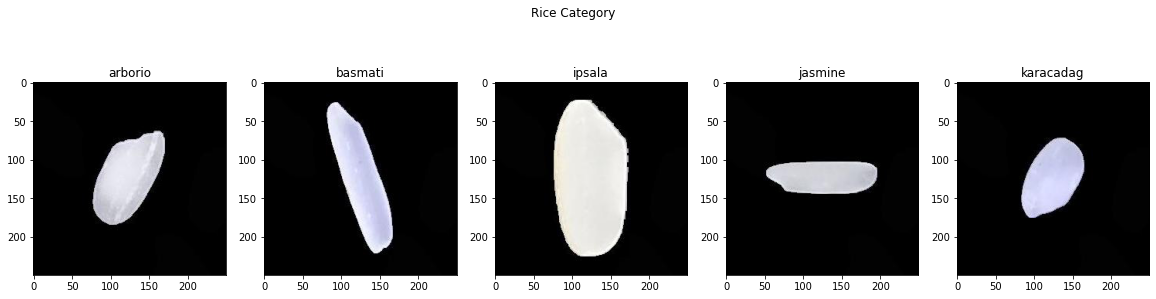

In [4]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_img = img.imread(arborio[0])
basmati_img = img.imread(basmati[0])
ipsala_img = img.imread(ipsala[0])
jasmine_img = img.imread(jasmine[0])
karacadag_img = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')


ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

# <b><span style='color:#2B0245'>Image labelling</span></b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#220070;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#79F3F9'>3 | Class labelling</span></b></b></p>
</div>

In [5]:
data_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

# Contains numerical labels for the categories
data_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

<div style="color:white;display:fill;border-radius:8px;
            background-color:#220070;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#79F3F9'>4 | Image and label split</span></b></b></p>
</div>

In [6]:
X, y = [], [] # X = images, y = labels
for label, images in data_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(data_labels[label])

In [7]:
X = np.array(X)
X = X/255
y = np.array(y)

# <b><span style='color:#2B0245'>Training & developement data split</span></b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#220070;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#79F3F9'>5 | Train test split</span></b></b></p>
</div>

In [8]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [9]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# <b><span style='color:#2B0245'>Model building</span></b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#220070;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#79F3F9'>6 | MobileNet model</span></b></b></p>
</div>

MobileNet is a computer vision neural network architecture designed specifically for efficient inference on mobile devices with limited compute resources. It was developed by Google and introduced in a 2017 paper titled "MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications".

The architecture of MobileNet is based on a streamlined version of the Inception architecture, which was developed for image classification tasks. It uses depthwise separable convolutions, which are a type of convolution operation that can significantly reduce the number of parameters and computational cost in the network without sacrificing accuracy.

![](https://miro.medium.com/max/692/1*7R068tzqqK-1edu4hbAVZQ.png)

The basic building block of MobileNet is the depthwise separable convolution, which consists of a depthwise convolution followed by a pointwise convolution. The depthwise convolution applies a single filter to each input channel, whereas the pointwise convolution combines the output of the depthwise convolution using a 1x1 convolution. This allows the network to learn more efficient representations of the input data while keeping the number of parameters and computational cost low.

MobileNet also includes other techniques to further reduce the number of parameters and computational cost, such as using lightweight fully connected layers and applying linear bottlenecks between the layers.

Overall, the goal of MobileNet is to provide a lightweight and efficient neural network architecture that can be used for a variety of vision tasks on mobile devices, including image classification, object detection, and semantic segmentation.

In [10]:
base_model = MobileNet(weights="imagenet", 
                       include_top=False, 
                       input_shape=(224, 224, 3))

2022-12-22 16:09:49.488324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 16:09:49.583259: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 16:09:49.584015: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 16:09:49.585913: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

17235968/17225924 [==============================] - 0s 0us/step


In [11]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [12]:
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(32, activation="relu"))
top_model.add(Dense(10, activation="softmax"))

top_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1605664   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 1,605,994
Trainable params: 1,605,994
Non-trainable params: 0
_________________________________________________________________


<div style="color:white;display:fill;border-radius:8px;
            background-color:#220070;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#79F3F9'>7 | Compiling & training</span></b></b></p>
</div>

In [13]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(top_model)

transfer_model.layers[0].trainable = False
transfer_model.summary()

transfer_model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = transfer_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
sequential (Sequential)      (None, 10)                1605994   
Total params: 4,834,858
Trainable params: 1,605,994
Non-trainable params: 3,228,864
_________________________________________________________________


2022-12-22 16:09:53.914895: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1354752000 exceeds 10% of free system memory.
2022-12-22 16:09:55.576679: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1354752000 exceeds 10% of free system memory.
2022-12-22 16:09:56.687461: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '
2022-12-22 16:09:59.052605: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


71/71 [==============================] - 11s 44ms/step - loss: 0.6483 - acc: 0.8916 - val_loss: 0.0475 - val_acc: 0.9894
Epoch 2/10
71/71 [==============================] - 2s 31ms/step - loss: 0.0526 - acc: 0.9880 - val_loss: 0.0587 - val_acc: 0.9681
Epoch 3/10
71/71 [==============================] - 2s 32ms/step - loss: 0.0147 - acc: 0.9942 - val_loss: 0.0385 - val_acc: 0.9840
Epoch 4/10
71/71 [==============================] - 2s 29ms/step - loss: 0.0097 - acc: 0.9956 - val_loss: 0.0650 - val_acc: 0.9787
Epoch 5/10
71/71 [==============================] - 2s 30ms/step - loss: 0.0147 - acc: 0.9960 - val_loss: 0.0975 - val_acc: 0.9840
Epoch 6/10
71/71 [==============================] - 2s 31ms/step - loss: 0.0054 - acc: 0.9982 - val_loss: 0.0302 - val_acc: 0.9894
Epoch 7/10
71/71 [==============================] - 2s 30ms/step - loss: 0.0028 - acc: 0.9987 - val_loss: 0.0448 - val_acc: 0.9840
Epoch 8/10
71/71 [==============================] - 2s 29ms/step - loss: 0.0065 - acc: 0.9969

<div style="color:white;display:fill;border-radius:8px;
            background-color:#220070;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#79F3F9'>8 | Performance analysis</span></b></b></p>
</div>

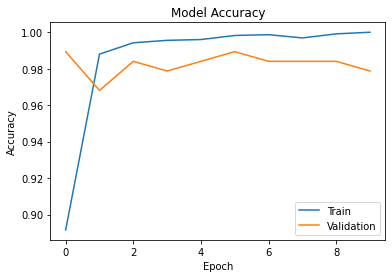

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

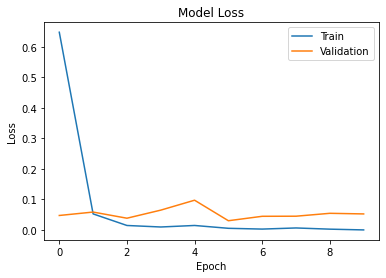

In [15]:
# Summarize History for Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()


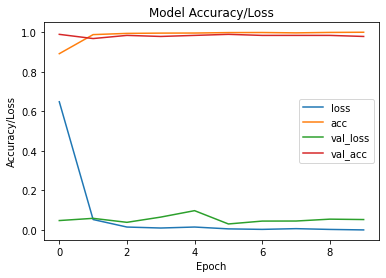

In [16]:
# Accuracy Loss Graph

pd.DataFrame(history.history).plot()
plt.title('Model Accuracy/Loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.show()


# <b><span style='color:#2B0245'>Activation mapping</span></b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#220070;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#79F3F9'>9 | Grad cam visualization</span></b></b></p>
</div>

Activation mapping is a technique used to visualize the activations or outputs of individual neurons in a neural network. It involves creating a map or heatmap of the activations of each neuron in the network as it processes an input image. This can provide insight into how the network is processing the input and how it is making decisions about the input.

There are several ways to create activation maps, but one common method is to pass an input image through the network and then use gradient-based optimization to modify the input image in such a way that it maximally activates a particular neuron. This can be done by calculating the gradient of the activation of the neuron with respect to the input image, and then using this gradient to update the input image in a way that increases the activation of the neuron.

Activation mapping can be useful for understanding how a neural network works and identifying potential problems or biases in the network. It can also be used to create visualization techniques such as saliency maps, which highlight the regions of the input image that are most important for the network's decision-making process.

![](https://miro.medium.com/max/1400/1*O5azF2X0KF1NQmpcooXF1Q.png)



91897856/91884032 [==============================] - 2s 0us/step


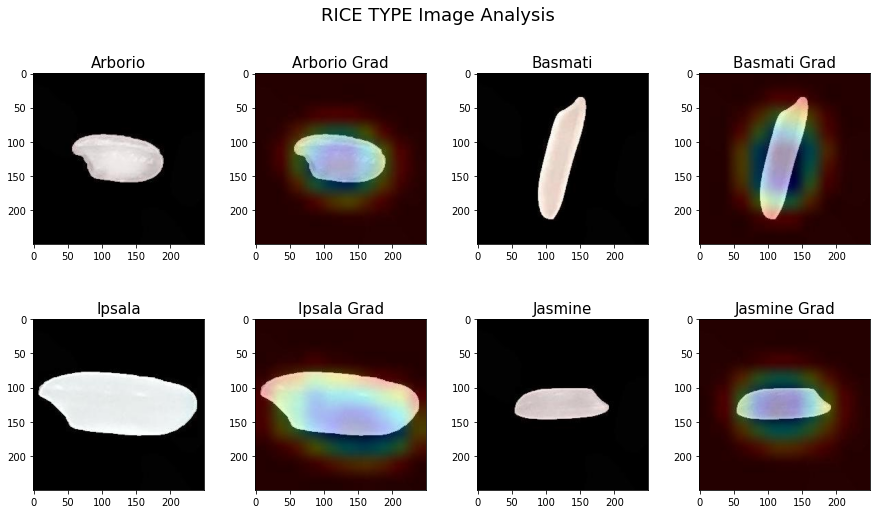

In [17]:

list_images_sample = ["/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (1).jpg",
"/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati/Basmati (1).jpg",
"/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (1).jpg",
"/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (1).jpg"]

model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions
imag = []

last_conv_layer_name = "block14_sepconv2_act"
# To Get Image into numpy array

def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size = size) 
    array = keras.preprocessing.image.img_to_array(img) 
    array = np.expand_dims(array, axis = 0)
    return array

# Top create heatmaps for the samples

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index = None):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Storing Heatmap values into list

covid_noncovid_heatmap = []

for i in list_images_sample:
    img_array = preprocess_input(get_img_array(i, size = img_size))
    model = model_builder(weights = "imagenet")
    model.layers[-1].activation = None
    preds = model.predict(img_array)
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    covid_noncovid_heatmap.append(heatmap)
# To Display GradCAM output for the samples

def save_and_display_gradcam(img_path, heatmap, cam_path = "cam.jpg", alpha = 0.4):
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)

    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    superimposed_img.save(cam_path)
    
    imag.append(cv2.imread(img_path))
    imag.append(cv2.imread("./cam.jpg"))


for i in range(len(list_images_sample)):
    save_and_display_gradcam(list_images_sample[i], covid_noncovid_heatmap[i])
    
    
def plot_multiple_img(img_matrix_list, title_list, ncols, main_title = ""):
    
    fig, myaxes = plt.subplots(figsize = (15, 8), nrows = 2, ncols = ncols, squeeze = False)
    fig.suptitle(main_title, fontsize = 18)
    fig.subplots_adjust(wspace = 0.3)
    fig.subplots_adjust(hspace = 0.3)
    
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        myaxes[i // ncols][i % ncols].imshow(img)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize = 15)
        
    plt.show()
    
    

titles_list = ["Arborio",'Arborio Grad','Basmati','Basmati Grad','Ipsala','Ipsala Grad','Jasmine','Jasmine Grad']

plot_multiple_img(imag, titles_list, ncols = 4, main_title = "RICE TYPE Image Analysis")
